In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from csv_to_dataframes import joined_table

In [98]:
joined_table.averagerating.describe()

count    2875.000000
mean        6.249217
std         1.185992
min         1.600000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.300000
Name: averagerating, dtype: float64

In [25]:
nona_gross = joined_table.loc[(joined_table.domestic_gross>0.0)&(joined_table.worldwide_gross>0) ]
nona_gross

,tconst,primary_title,start_year,runtime_minutes,genres,id,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross,averagerating
33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN
40,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5
48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17.0,25000000.0,720828.0,9313302.0,-15686698.0,-62.746792,6.1
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,91000000.0,58236838.0,187861183.0,96861183.0,106.440860,7.3
58,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67.0,28000000.0,26017685.0,62108587.0,34108587.0,121.816382,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
145946,tt9861522,Ali,2019,110.0,Drama,45.0,109000000.0,58183966.0,87683966.0,-21316034.0,-19.555994,7.7
146052,tt9877596,Trapped,2016,NaN,NaN,87.0,30000000.0,6916869.0,6916869.0,-23083131.0,-76.943770,NaN
146146,tt9889072,The Promise,2017,NaN,Drama,78.0,90000000.0,8224288.0,10551417.0,-79448583.0,-88.276203,NaN
146234,tt9899880,Columbus,2018,85.0,Comedy,93.0,700000.0,1017107.0,1110511.0,410511.0,58.644429,5.8


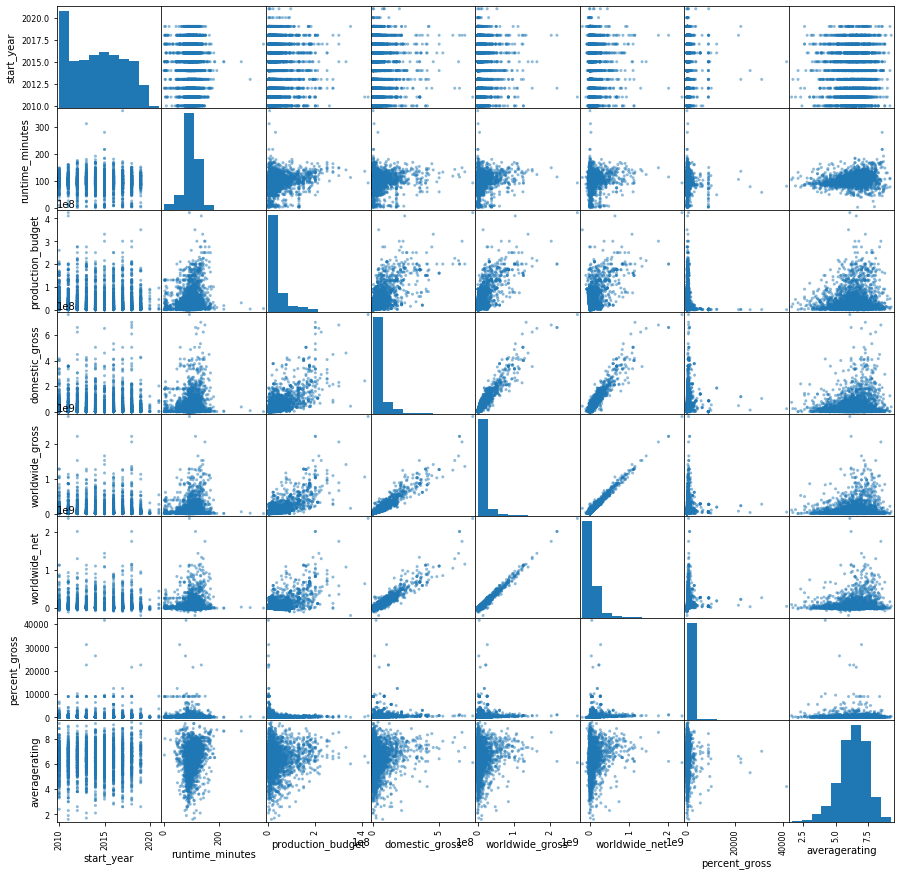

In [35]:
matrix = pd.plotting.scatter_matrix(for_matrix_df, figsize=(15,15))

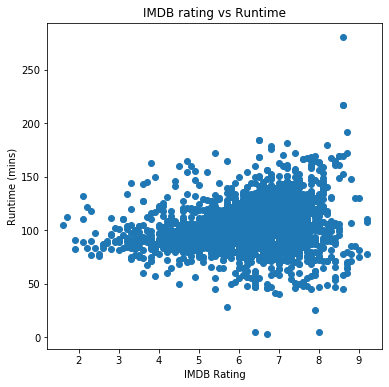

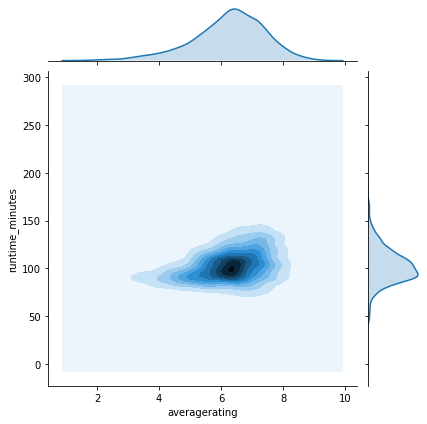

In [51]:
run_rate_corr = joined_table.runtime_minutes.corr(joined_table.averagerating)

figure1, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
ax.scatter(joined_table.averagerating,joined_table.runtime_minutes);
ax.set_title('IMDB rating vs Runtime')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Runtime (mins)')
sns.jointplot(x=joined_table.averagerating,y=joined_table.runtime_minutes,kind="kde")

Text(0, 0.5, 'Percent Gross')

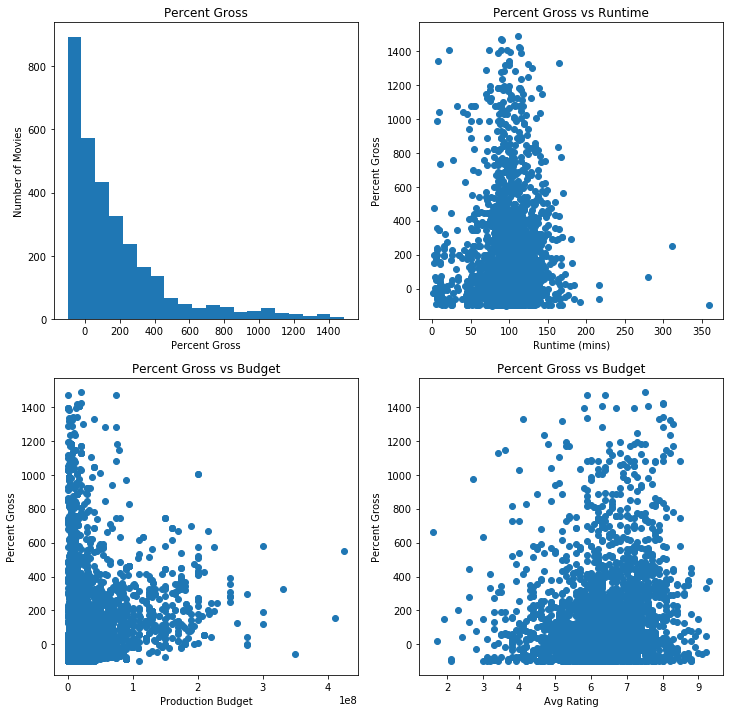

In [101]:
figure2, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

#Plots for percent gross
#Eliminate outliers for percent gross via loc

#histogram
ax[0][0].hist(nona_gross.loc[nona_gross.percent_gross <= 1500].percent_gross, bins=20);
ax[0][0].set_title('Percent Gross');
ax[0][0].set_xlabel('Percent Gross');
ax[0][0].set_ylabel('Number of Movies')

#scatter vs runtime
ax[0][1].scatter(nona_gross.loc[nona_gross.percent_gross <= 1500].runtime_minutes,
                nona_gross.loc[nona_gross.percent_gross <= 1500].percent_gross);
ax[0][1].set_title('Percent Gross vs Runtime')
ax[0][1].set_xlabel('Runtime (mins)')
ax[0][1].set_ylabel('Percent Gross')

#scatter vs production. budget
ax[1][0].scatter(nona_gross.loc[nona_gross.percent_gross <= 1500].production_budget,
                nona_gross.loc[nona_gross.percent_gross <= 1500].percent_gross);
ax[1][0].set_title('Percent Gross vs Budget');
ax[1][0].set_xlabel('Production Budget');
ax[1][0].set_ylabel('Percent Gross')


#scatter vs avg rating
ax[1][1].scatter(nona_gross.loc[nona_gross.percent_gross <= 1500].averagerating,
                nona_gross.loc[nona_gross.percent_gross <= 1500].percent_gross);
ax[1][1].set_title('Percent Gross vs Budget');
ax[1][1].set_xlabel('Avg Rating');
ax[1][1].set_ylabel('Percent Gross')


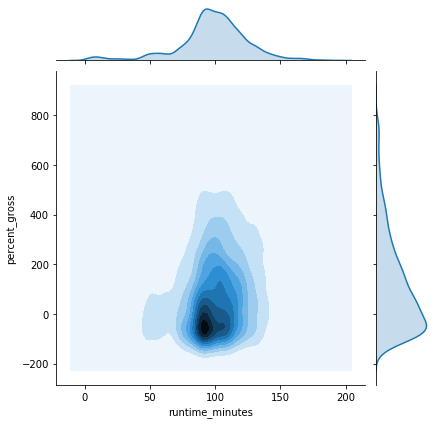

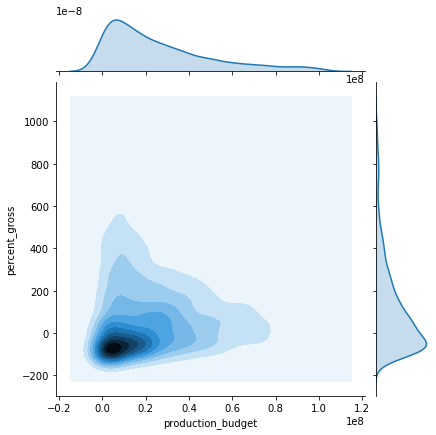

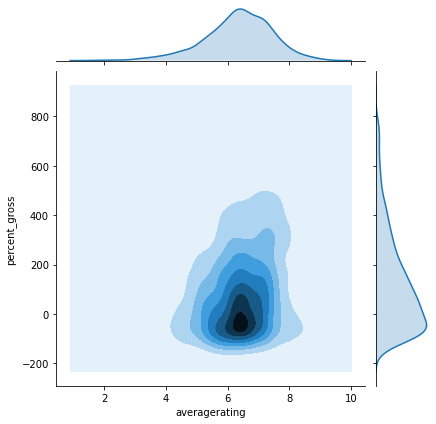

In [109]:
#Estimate Densities to find the typical movie
sns.jointplot(nona_gross.loc[(nona_gross.percent_gross <= 800)&(nona_gross.runtime_minutes <=200)].runtime_minutes,
              nona_gross.loc[(nona_gross.percent_gross <= 800)&(nona_gross.runtime_minutes <=200)].percent_gross, 
              kind="kde")

sns.jointplot(nona_gross.loc[(nona_gross.percent_gross <= 1000)&(nona_gross.production_budget <=1e8)].production_budget,
              nona_gross.loc[(nona_gross.percent_gross <= 1000)&(nona_gross.production_budget <=1e8)].percent_gross,
              kind="kde")

sns.jointplot(nona_gross.loc[nona_gross.percent_gross <= 800].averagerating,
                nona_gross.loc[nona_gross.percent_gross <= 800].percent_gross, kind="kde")